# 1.3 Расстояние $\chi^2$ Пирсона

O - observed (наблюдаемый)  
E - expected (ожидаемый)  

$$\chi^2=\sum^n_{i=1}{\frac{(O_i-E_i)^2}{E_i}}$$

### Пример 1  
#### Чему будут равны ожидаемые значения частот и $\chi^2$?


In [5]:
import numpy as np

#В одном из опытов эмпирическое распределение частот некоторого цвета гороха приняло следующий вид:
peas = np.array([18,55,27])
#предполагаемое теоретическое распределение имеет следующий вид
prop = np.array([1,2,1])

Ei = prop*peas.sum()/prop.sum()
print(f"{Ei=}")
x2 = (((peas - Ei)**2)/Ei).sum()
print(f"{x2=}")



Ei=array([25., 50., 25.])
x2=2.62


# 1.4 Расспределение $\chi^2$ Пирсона

### Пример 2  
#### Симуляция распределения $\chi^2$

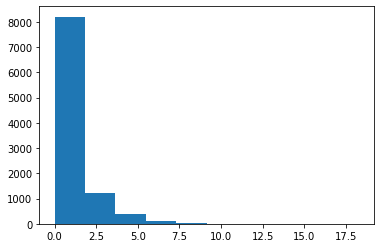

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(np.random.chisquare(1, 10000), 10)
plt.show()

**Распределение Хи-квадрат с k степенями свободы** - *это распределение суммы квадратов k независимых стандартных нормальных случайных величин*

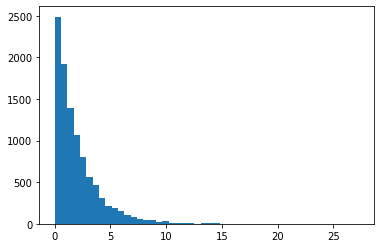

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(np.array([np.random.normal(0, 1)**2 +
         np.random.normal(0, 1)**2 for _ in range(10000)]), bins=48)
plt.show()

**Расстояние Хи-квадрат с k степенями свободы** - это квадрат расстояния до точки в k - мерном пространстве.  
Распределение с большим количеством степеней свободы будет стремиться к нормальному.

Давайте вспомним как рассчитывается значение статистики в тесте Стьюдента (на примере одновыборочного теста):

$$t = \frac{\bar{x} - \mu }{\frac{s}{\sqrt{n}}}
$$

В знаменателе у нас находится стандартная ошибка, которая представляет собой выборочное стандартное отклонение, делённое на  корень из объёма выборки. В расчёт стандартного отклонения входит сумма квадратов отклонений наблюдаемых значений от их среднего значения - то есть сумма нескольких случайных положительных величин. А из предыдущих степов мы знаем, что сумма квадратов n случайных положительных величин может быть описана при помощи распределения хи-квадрат с n-1 степеням свободы! Так как зная выборочное среднее и n-1 элементов выборки мы всегда можем точно задать последний элемент! Получается, в знаменателе t-статистики у нас спрятано распределение хи-квадрат, для которого нам и нужно знать количество степеней свободы! Таким образом, степени свободы в T-распределении на самом деле берутся из распределения хи-квадрат, которое спрятано в формуле T-статистики.

Давайте теперь вспомним формулу F-статистики, которая является главным показателем дисперсионного анализа:

$$F = \frac{\sum_{j=1}^{k} n_{i}(\bar{y_{j}} - \bar{y})^2/(k-1)}{\sum_{j=1}^{k}\sum_{i=1}^{n_{j}} (y_{ij} - \bar{y_{j}})^2/(n-k)}$$

В числителе находится сумма квадратов отклонений групповых средних от общего среднего. В знаменателе у нас сумма квадратов отклонений наблюдений от внутригрупповых средних. Таким образом, у нас опять две величины, складывающиеся из квадратов независимых положительных случайных величин. Высчитывая F-значение, мы делим одну величину, имеющую распределение хи-квадрат, на другую величину, имеющую распределение хи-квадрат. Каждой из них соответствует своё количество степеней свободы. Получается, что распределение F-статистики будет характеризоваться двумя параметрами - степенями свободы для двух распределений хи-квадрат!

# 1.5 Рассчет p-уровня значимости

**Число степеней свободы** - это число независимых слагаемых в распределении хи-квадрат  
Например для монетки будет одна степень свободы. Так если из 60 подбрасываний 20 раз выпалала решка, то мы можем точно сказать, что 40 раз выпал орел. С игральной костью - тоже самое: если мы знаем сколько раз выпали 5 граней, то можем точно сказать - сколько раз выпала 6 грань. Т.е. для игральной кости число степеней свободы = 5.

In [21]:
from scipy.stats import chisquare

# p-value
print("p-value =", chisquare([20, 40], ddof=0).pvalue)

p-value = 0.009823274507519235


#### Пример 1  
Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?

In [16]:
from scipy import stats

a = stats.chi2.cdf(2, 2)
b = stats.chi2.cdf(4, 2)

print(b-a)

0.23254415793482963


#### Пример 2  
p-уровень значимости для нашего примера с игральной костью

In [22]:
from scipy.stats import chisquare

# p-value
print("p-value =", chisquare([10, 10, 10, 5, 10, 15], ddof=0).pvalue)

p-value = 0.4158801869955079


#### Пример 3  
Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий

In [28]:
from scipy.stats import chisquare

print("X^2 =", round(chisquare([10, 30, 50]).statistic, 1))

X^2 = 26.7


#### Пример 4
распределение частот девушек и юношей

In [29]:
from scipy.stats import chisquare

# p-value
print("p-value =", chisquare([15, 9], ddof=0).pvalue)

p-value = 0.22067136191984324


#### Пример 5  
Оценка поступка Сноудена

In [30]:
from scipy.stats import chisquare

# p-value
o1 = 1500*0.53
print("p-value =", chisquare([o1, 1500-o1], ddof=0).pvalue)

p-value = 0.02013675155034633


## 1.6 Анализ таблиц сопряженности

|   | Юноши | Девушки | Всего |
|---|---|---|---|
| **Биологи** | 15 | 9 | 24 |
| **Информатики** | 11 | 6 | 17 |
| **Всего** | 26 | 15 | 41 |

$$VS$$

|   | Юноши | Девушки | Всего |
|---|---|---|---|
| **Биологи** | 15.2 | 8.8 |24|
| **Информатики** | 10.8 | 6.2 |17|
| **Всего** | 26 | 15 |41|

**Нулевая Гипотеза** - Распределение не отличается от ожидаемого  
**Альтернативная гипотеза** - Распределение отличается, или иными словами 2 переменные взаимосвязаны между собой  

Формала рассчеча ожидаемого значения:
$$
f_{ij} = \frac{f_i \cdot f_j}{N},\\
f_{i}\ -\ число\ наблюдений\ в\ i-ой\ строке \\
f_{j}\ -\ число\ наблюдений\ в\ j-ой\ строке\\
N\ -\ Общее\ количество\ наблюдений 
$$


#### Пример 1
Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y


In [5]:
import numpy as np
from scipy import stats

XY = np.array([[10, 6],
               [5, 15]], dtype='float64')

f = np.array(XY)

for j, vi in enumerate(XY.sum(axis=0)):
    for i, vj in enumerate(XY.sum(axis=1)):
        f[i, j] = vi * vj / XY.sum()
        
print("Ручной рассчет:\n", f)

f = stats.contingency.expected_freq(XY)
print("Рассчет с помощью библиотеки scipy:\n", f)
print(f"max freq = {f.max():.1f}")

Ручной рассчет:
 [[ 6.66666667  9.33333333]
 [ 8.33333333 11.66666667]]
Рассчет с помощью библиотеки scipy:
 [[ 6.66666667  9.33333333]
 [ 8.33333333 11.66666667]]
max freq = 11.7


#### Поправка Йетса  
В теории распределение хи-квадрат непрерывно, тогда как вычисляемые значения всегда дискретны, в результате нулевая гипотеза может отвергаться слишком часто. Чтобы скорректирвоать значения p-уровня значимости, применяется поправка Йетса на непрерывность. *Обычно применяется, когда некоторые ожидаемые частоты меньше 10 и для таблиц 2х2*.

$$\chi^2=\sum^n_{i=1}{\frac{(\mid O_i-E_i\mid - 0.5)^2}{E_i}}$$

In [30]:
import numpy as np
from scipy import stats

O = np.array([[15, 9], [11, 6]], dtype='float64')
E = stats.contingency.expected_freq(O)
yets = 0.5

X2 = np.sum((np.absolute(O-E)-0.5)**2/E)
print(f"{X2=}")
chi2, p_value, ddof, expected = stats.chi2_contingency(O, correction=True)
print(f"{chi2=} {p_value=} {ddof=} {expected=}")

X2=0.0340764831573656
chi2=0.0 p_value=1.0 ddof=1 expected=array([[15.2195122,  8.7804878],
       [10.7804878,  6.2195122]])


**Выводы:**
- Критерий хи-квадрат проверяет гипотезу о том, что наблюдаемое распределение номинативной переменной отличается от ожидаемого
- Для одной номинативной переменной df=n-1, где n - количество столбцов таблицы
- Для таблиц сопряженности df = (n-1) * (m-1), где n - количество столбцов, m - количество строк

**Условия применения:**  
1. Все наблюдения независимы
2. Минимальное количество ожидаемых наблюдений в каждой из ячеек должно быть больше 5.

#### Пример 1 Проверьте нулевую гипотезу о взаимосвязи стиля вождения и пола водителя. 

In [41]:
import numpy as np
from scipy import stats

O = np.array([[20, 15], [11, 12], [7, 9]], dtype='float64')
chi2, p_value, ddof, expected = stats.chi2_contingency(O)
print(f"{chi2=:.2f} {p_value=:.2f} {ddof=} \nexpected values:\n{np.round(expected,2)}")

chi2=0.95 p_value=0.62 ddof=2 
expected values:
[[17.97 17.03]
 [11.81 11.19]
 [ 8.22  7.78]]


### Анализ остатков  
Позволяет выявить, какие именно частоты значимо отклоняются от ожидаемых значений

         Yes  No
Placebo   18   7
Aspirin    6  13


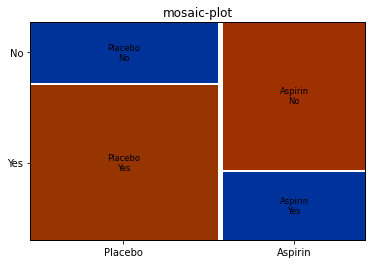

In [74]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

tab = pd.DataFrame([[18,7],[6,13]], index=('Placebo','Aspirin'), columns=['Yes','No'])
print(tab)

_=mosaic(tab.stack(), horizontal=True, title='mosaic-plot', statistic=True, gap=0.02)

**Итого:**
- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке.
- если значения стандартизированных остатков по модулю больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

## 1.8 Точный критерий Фишера
Как правило применяется для очень маленьких выборок, когда критерий хи-квадрат применять не совсем корректно. В тесте Фишера фиксированы и суммы по строкам, и суммы по столбцам.

| | Поправился | Не поправился | Сумма |
|---|---|---|---|
|Лекарство №1 | a | b |a+b|
|Лекарство №2 | c | d |c+d|
|Сумма|a+c|b|d|n|

$$
p=\frac{C_{a+b}^a\cdot C_{c+d}^c}{C_{n}^{a+c}},\ p\ -\ вероятность,\ С\ -\ число\ сочетаний 
$$